In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries for Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.experimental import enable_iterative_imputer  # Explicitly enable experimental feature
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("planetary_systems.csv")

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_13537/2465283543.py:1: DtypeWarning: Columns (3,4,51,66,96,100,104,108,128,149,154,163,184,188,207,212,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("planetary_systems.csv")


In [4]:
df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,pl_refname,...,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2
0,Kepler-6 b,b,Kepler-6,NaN,NaN,TIC 27916356,Gaia DR2 2086636884980514304,Gaia DR3 2086636884980514304,1,<a refstr=ESTEVES_ET_AL__2015 href=https://ui....,...,0.021,-0.021,12.001&plusmn;0.021,11.706,0.019,-0.019,11.706&plusmn;0.019,11.634,0.019,-0.019
1,Kepler-6 b,b,Kepler-6,NaN,NaN,TIC 27916356,Gaia DR2 2086636884980514304,Gaia DR3 2086636884980514304,0,<a refstr=MORTON_ET_AL__2016 href=https://ui.a...,...,0.021,-0.021,12.001&plusmn;0.021,11.706,0.019,-0.019,11.706&plusmn;0.019,11.634,0.019,-0.019
2,Kepler-6 b,b,Kepler-6,NaN,NaN,TIC 27916356,Gaia DR2 2086636884980514304,Gaia DR3 2086636884980514304,0,<a refstr=FULTON__AMP__PETIGURA_2018 href=http...,...,0.021,-0.021,12.001&plusmn;0.021,11.706,0.019,-0.019,11.706&plusmn;0.019,11.634,0.019,-0.019
3,Kepler-6 b,b,Kepler-6,NaN,NaN,TIC 27916356,Gaia DR2 2086636884980514304,Gaia DR3 2086636884980514304,0,<a refstr=KOKORI_ET_AL__2023 href=https://ui.a...,...,0.021,-0.021,12.001&plusmn;0.021,11.706,0.019,-0.019,11.706&plusmn;0.019,11.634,0.019,-0.019
4,Kepler-6 b,b,Kepler-6,NaN,NaN,TIC 27916356,Gaia DR2 2086636884980514304,Gaia DR3 2086636884980514304,0,<a refstr=Q1_Q16_KOI_TABLE href=https://exopla...,...,0.021,-0.021,12.001&plusmn;0.021,11.706,0.019,-0.019,11.706&plusmn;0.019,11.634,0.019,-0.019


In [5]:
df.shape

(39179, 355)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39179 entries, 0 to 39178
Columns: 355 entries, pl_name to sy_kmagerr2
dtypes: float64(239), int64(26), object(90)
memory usage: 106.1+ MB


In [7]:
df.describe()

,default_flag,disc_year,ra,dec,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,...,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2
count,39179.000000,39179.000000,39179.000000,39179.000000,39179.000000,39179.000000,39179.000000,39179.000000,3.589800e+04,3.421300e+04,...,38364.000000,38342.000000,38244.000000,38244.000000,38371.000000,38233.000000,38233.000000,38368.000000,38126.000000,38126.000000
mean,0.154700,2015.535695,262.862833,31.766846,104.686434,9.920611,275.196215,47.059488,1.218127e+04,1.409650e+04,...,-0.116617,11.998973,0.029786,-0.029586,11.619068,0.031124,-0.031003,11.532054,0.034926,-0.034445
std,0.361623,3.999913,70.363716,28.043123,73.029456,21.084720,75.435402,35.153543,2.122966e+06,2.541170e+06,...,0.179391,2.307282,0.122627,0.115880,2.316942,0.083930,0.086474,2.332504,0.185183,0.176575
min,0.000000,1992.000000,0.185606,-88.121111,0.029010,-88.324780,0.366730,-88.605690,9.070629e-02,0.000000e+00,...,-12.270000,-2.095000,0.017000,-8.888000,-2.775000,0.014000,-8.990000,-3.044000,0.011000,-11.140000
25%,0.000000,2014.000000,283.039845,38.258168,73.505835,9.227980,293.184170,58.292570,4.388850e+00,8.000000e-06,...,-0.137000,11.103000,0.022000,-0.027000,10.736000,0.021000,-0.031000,10.650000,0.020000,-0.033000
50%,0.000000,2016.000000,289.553232,42.605664,77.446160,12.763510,304.504800,62.921420,1.033852e+01,3.818000e-05,...,-0.092000,12.703000,0.024000,-0.024000,12.311000,0.025000,-0.025000,12.235000,0.024000,-0.024000
75%,0.000000,2016.000000,294.463916,46.640874,81.951100,16.584560,312.729730,66.694970,2.662946e+01,2.000000e-04,...,-0.046000,13.616000,0.027000,-0.022000,13.231000,0.031000,-0.021000,13.145000,0.033000,-0.020000
max,1.000000,2025.000000,359.974984,86.860343,359.996270,88.998980,359.897300,87.128540,4.020000e+08,4.700000e+08,...,-0.001000,25.340000,8.888000,-0.017000,33.830000,6.990000,-0.014000,35.330000,9.995000,-0.011000


In [8]:
df.isnull().sum()

pl_name            0
pl_letter          0
hostname           0
hd_name        36277
hip_name       36011
               ...  
sy_hmagerr2      946
sy_hmagstr       808
sy_kmag          811
sy_kmagerr1     1053
sy_kmagerr2     1053
Length: 355, dtype: int64

In [9]:
# Expanded feature list with NASA Archive names
feature_cols = [
    # --- Planetary Physical Params ---
    'pl_orbper',    # Period (keep)
    'pl_rade',      # Radius (keep)
    'pl_bmasse',    # Mass (keep)
    'pl_orbsmax',   # Semi-major axis (CRITICAL for distinguishing Transit vs Imaging)
    'pl_orbeccen',  # Eccentricity (High eccen -> likely RV)
    'pl_dens',      # Density (often implies Transit + RV)
    
    # --- Stellar Params ---
    'st_teff',      # Star Temp (keep)
    'st_rad',       # Star Radius (keep)
    'st_mass',      # Star Mass (keep)
    'st_met',       # Metallicity (Correlates with Gas Giants/RV)
    'st_logg',      # Surface Gravity (Dwarf vs Giant stars)
    'st_age',       # System Age (Young stars -> Direct Imaging)
    
    # --- System Params ---
    'sy_dist',      # Distance (keep - Microlensing is often very far)
    'sy_vmag'       # Visual Magnitude (keep - RV needs bright stars)
]

# Note: 'pl_orbincl' (Inclination) is excluded to avoid data leakage, 
# as it effectively hard-codes the Transit geometry.

target_col = 'discoverymethod'

# Verify columns exist
available_cols = [c for c in feature_cols if c in df.columns]
print(f"Features selected: {available_cols}")

# Create subset
data = df[available_cols + [target_col]].copy()

# Preview raw data
print(f"Original dataset shape: {data.shape}")
data.head()


Features selected: ['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_orbsmax', 'pl_orbeccen', 'pl_dens', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_age', 'sy_dist', 'sy_vmag']
Original dataset shape: (39179, 15)


,pl_orbper,pl_rade,pl_bmasse,pl_orbsmax,pl_orbeccen,pl_dens,st_teff,st_rad,st_mass,st_met,st_logg,st_age,sy_dist,sy_vmag,discoverymethod
0,3.234700,14.616536,212.31044,0.04852,NaN,0.4,5647.0,1.391,1.209,0.34,4.236,NaN,587.039,13.286,Transit
1,3.234699,13.380000,NaN,NaN,NaN,NaN,5690.0,1.290,1.050,0.26,4.240,7.76,587.039,13.286,Transit
2,3.234699,13.101000,NaN,0.04408,NaN,NaN,5660.0,1.261,1.090,0.36,NaN,6.46,587.039,13.286,Transit
3,3.234699,NaN,NaN,NaN,NaN,NaN,5647.0,1.391,1.209,0.34,4.236,3.80,587.039,13.286,Transit
4,3.234699,13.410000,NaN,0.04350,0.0,NaN,5640.0,1.291,1.047,0.34,4.236,NaN,587.039,13.286,Transit


In [10]:
# Check for missing values (Sparsity Check)
# different methods will have different missing value patterns!
print(data.groupby(target_col).count())

                               pl_orbper  pl_rade  pl_bmasse  pl_orbsmax  \
discoverymethod                                                            
Astrometry                             5        0          5           3   
Disk Kinematics                        0        0          1           1   
Eclipse Timing Variations             24        0         24          17   
Imaging                               46       43        137         135   
Microlensing                          20        0        731         707   
Orbital Brightness Modulation         20       13          8           9   
Pulsar Timing                         12        0         13          12   
Pulsation Timing Variations            2        0          2           1   
Radial Velocity                     2713      128       2694        2481   
Transit                            32907    26737       3428       18493   
Transit Timing Variations            149       96         43          91   

           

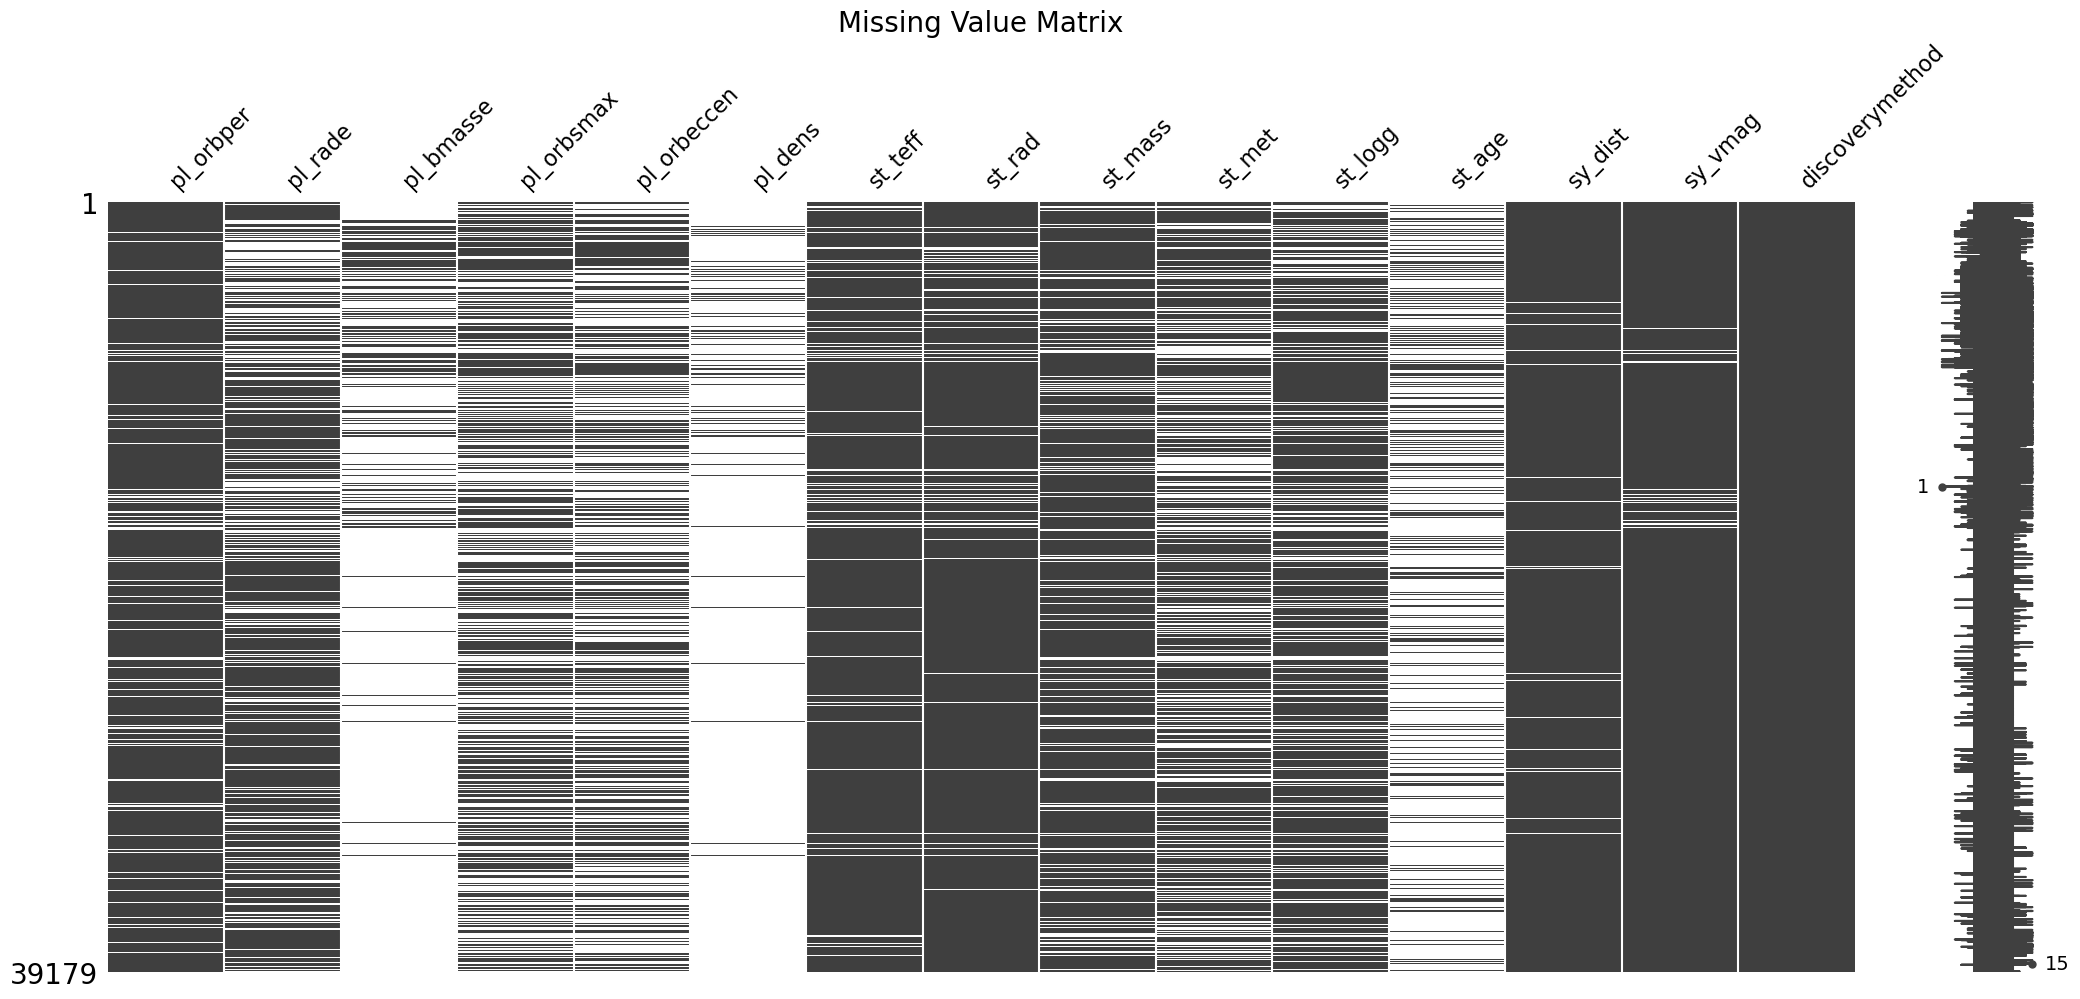

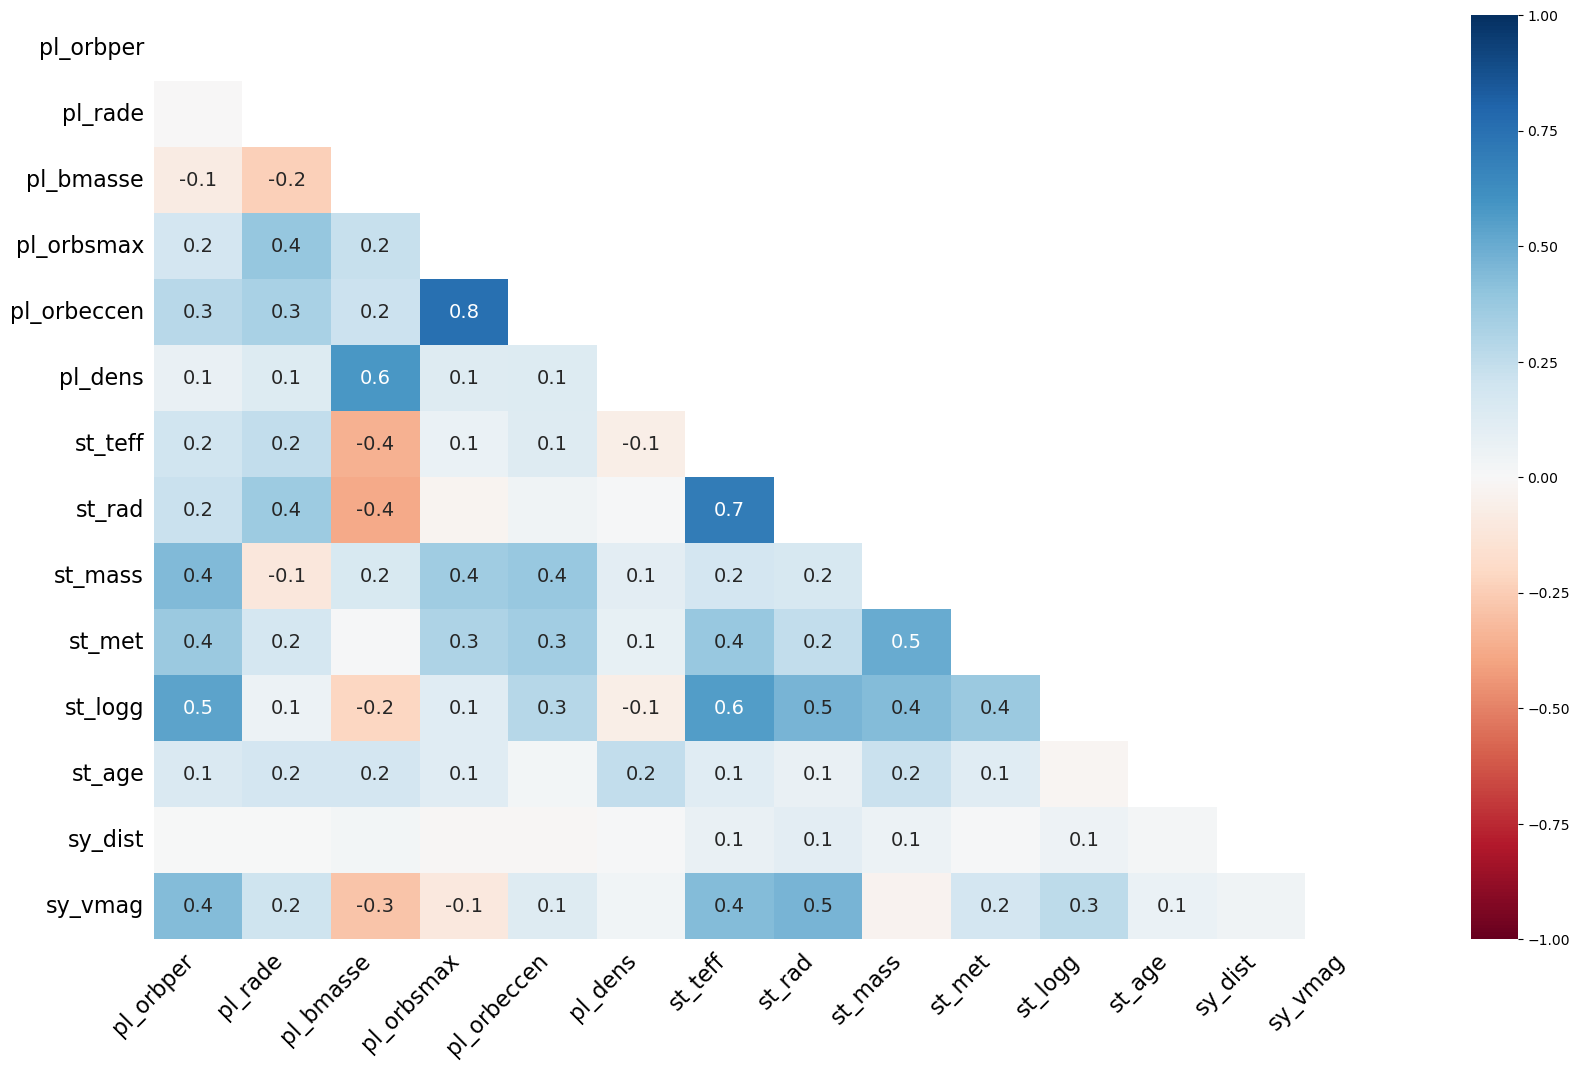

In [11]:
import missingno as msno

# Visualizing the missing data pattern for your selected features
selected_features = feature_cols + [target_col]
msno.matrix(df[selected_features])
plt.title("Missing Value Matrix", fontsize=20)
plt.show()

# Correlation of missingness (Does missing Mass imply missing Radius?)
msno.heatmap(df[selected_features])
plt.show()

In [12]:
# 1. Drop rows where the target (discovery method) is missing
data = data.dropna(subset=[target_col])

# 2. Filter out rare detection methods (e.g., < 20 samples)
# This removes obscure methods that would confuse the classifier
counts = data[target_col].value_counts()
common_methods = counts[counts > 20].index
data = data[data[target_col].isin(common_methods)]

print(f"Classes to predict: {list(common_methods)}")

# 3. Handle Missing Data (Imputation)
# Mass (pl_bmasse) is frequently missing. We use median imputation.
imputer = SimpleImputer(strategy='median')
X = data[available_cols]
y = data[target_col]

# Impute missing values
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=available_cols)

# 4. Encode Target Labels (Text -> Integers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Processed dataset shape: {X_imputed.shape}")

Classes to predict: ['Transit', 'Radial Velocity', 'Microlensing', 'Imaging', 'Transit Timing Variations', 'Eclipse Timing Variations', 'Orbital Brightness Modulation']
Processed dataset shape: (39158, 14)


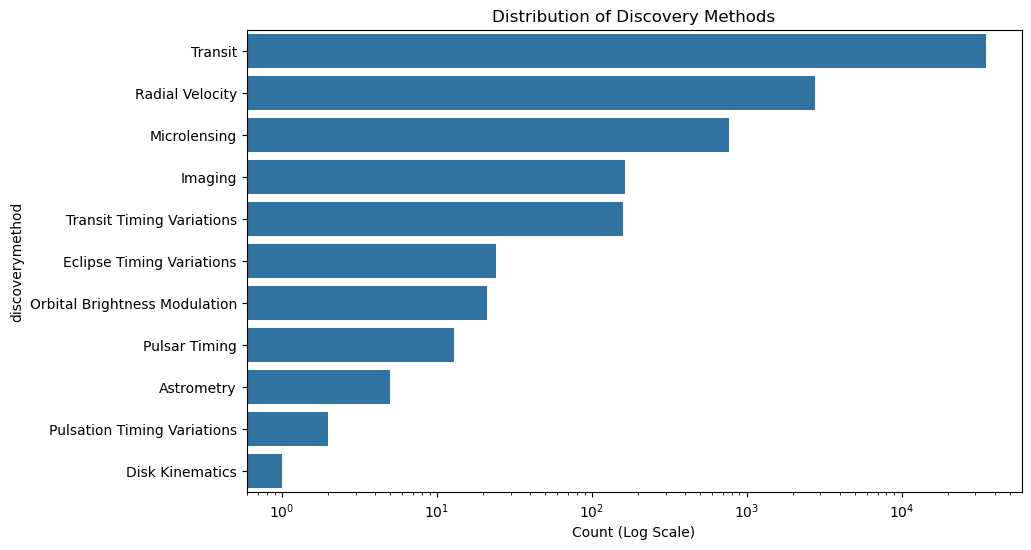

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y=target_col, data=df, order=df[target_col].value_counts().index)
plt.title("Distribution of Discovery Methods")
plt.xscale('log') # Log scale because Transit dominates heavily
plt.xlabel("Count (Log Scale)")
plt.show()

In [14]:
# Split data: 80% Training, 20% Testing
# Stratify ensures the class distribution is preserved in the split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features (Standardization: Mean=0, Variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 31326
Testing samples: 7832


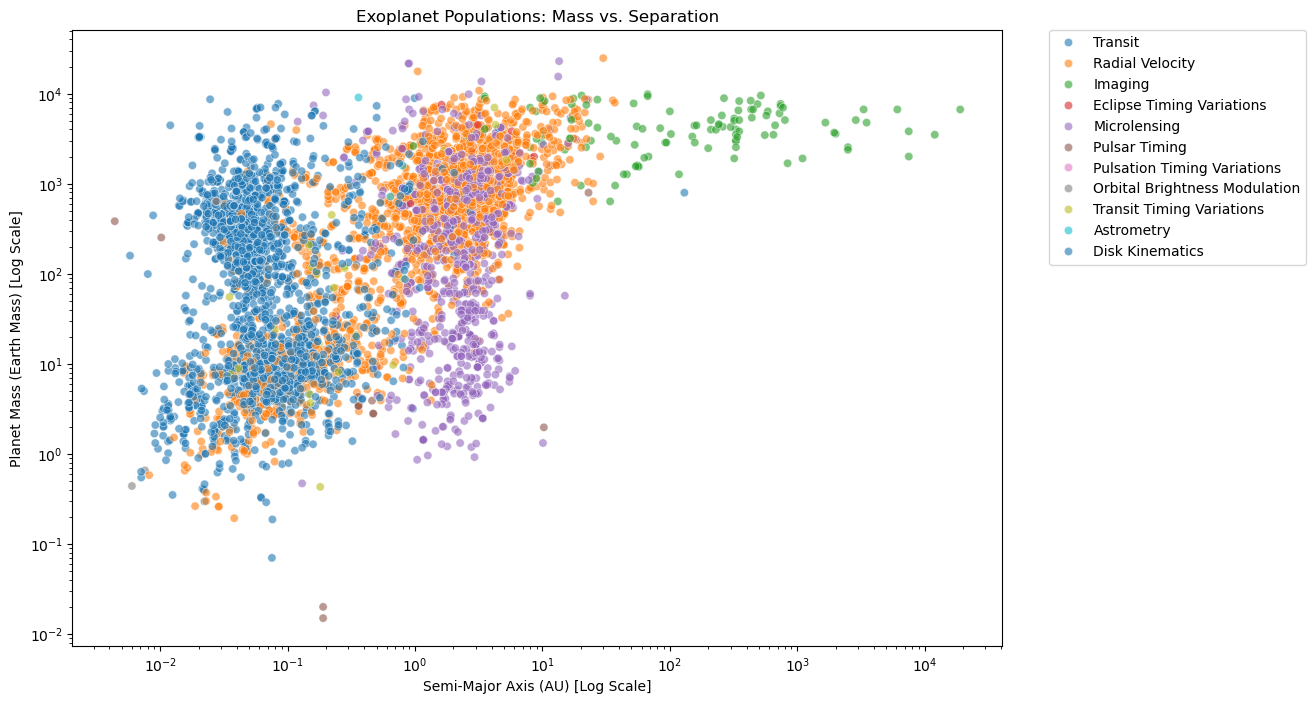

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='pl_orbsmax', 
    y='pl_bmasse', 
    hue='discoverymethod',
    alpha=0.6,
    palette='tab10'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU) [Log Scale]')
plt.ylabel('Planet Mass (Earth Mass) [Log Scale]')
plt.title('Exoplanet Populations: Mass vs. Separation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

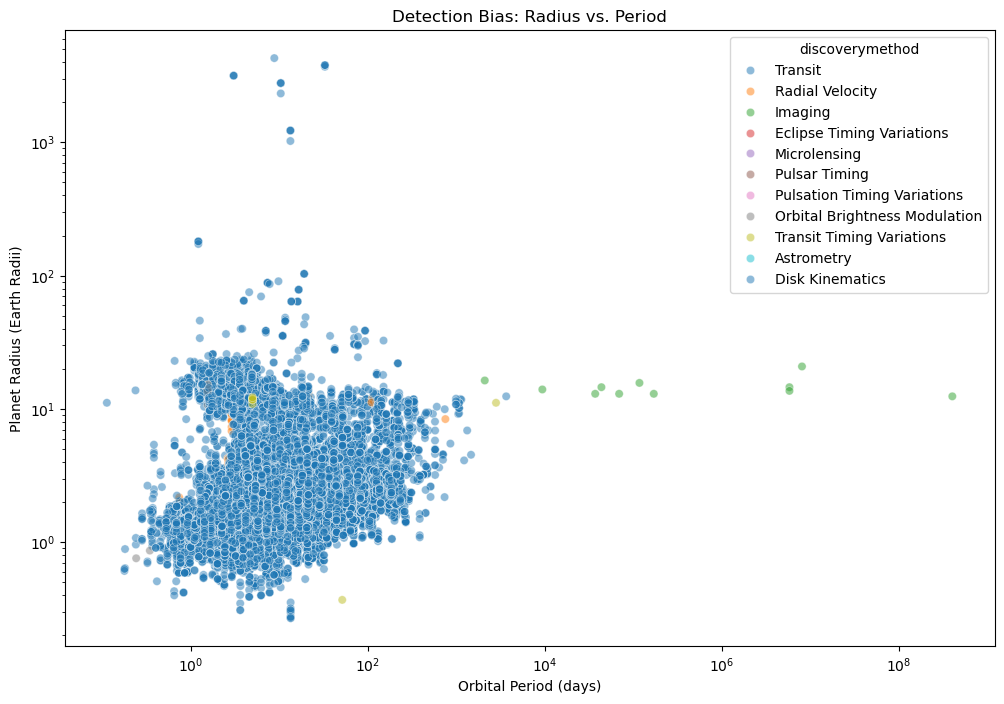

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='pl_orbper', 
    y='pl_rade', 
    hue='discoverymethod',
    alpha=0.5,
    palette='tab10'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.title('Detection Bias: Radius vs. Period')
plt.show()

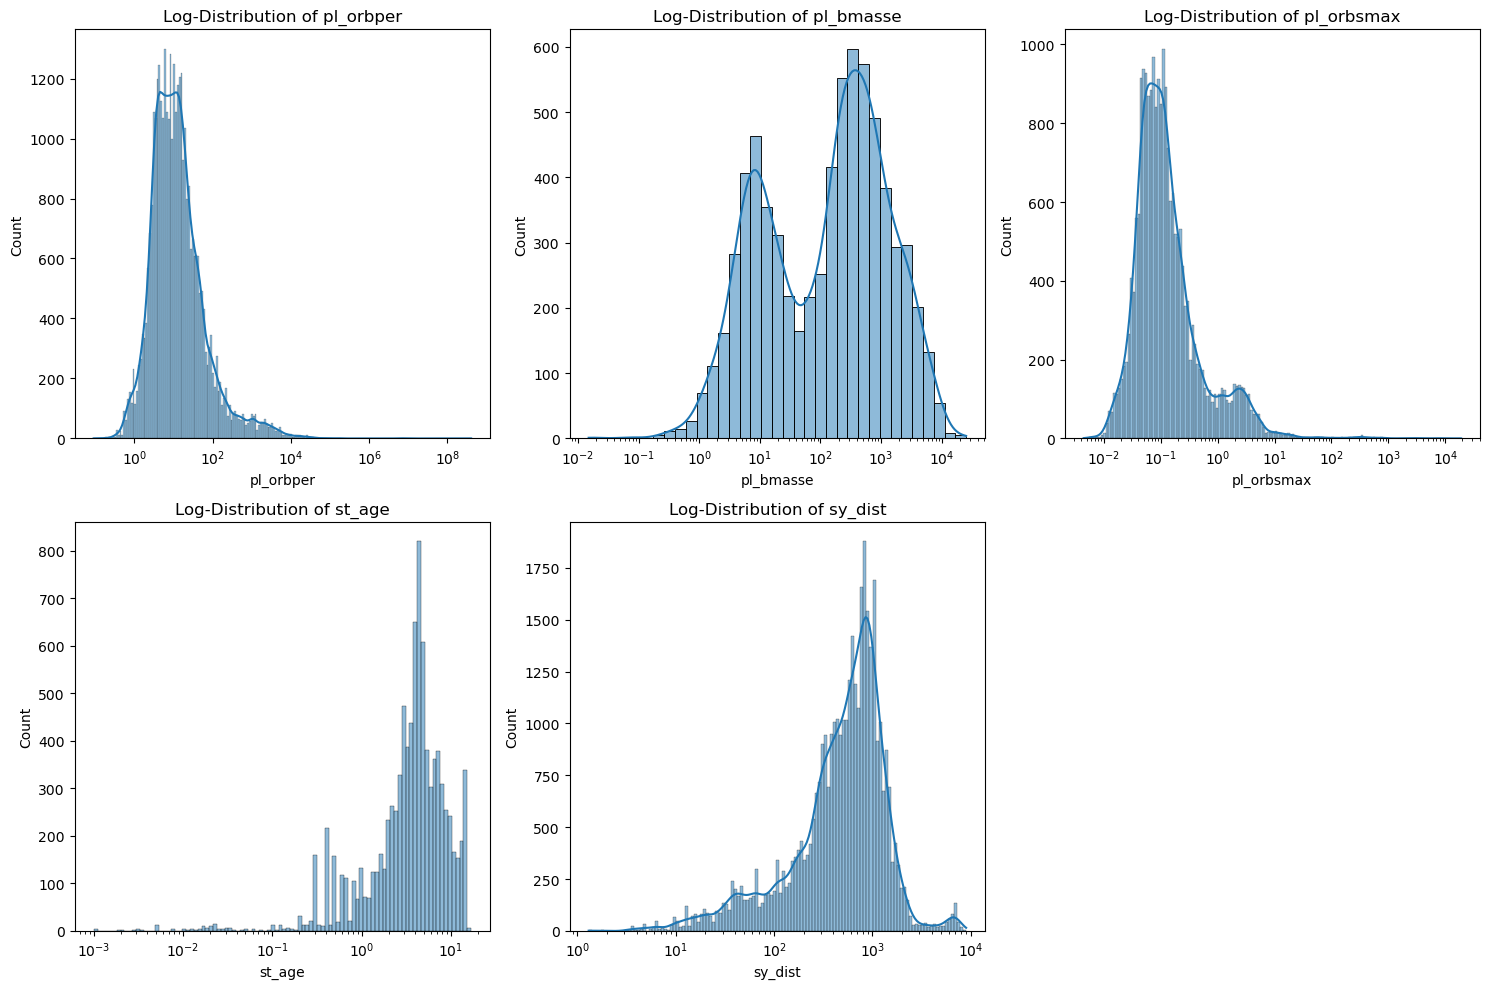

In [17]:
# List of columns that likely follow a power law or log-normal distribution
log_cols = ['pl_orbper', 'pl_bmasse', 'pl_orbsmax', 'st_age', 'sy_dist']

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_cols):
    if col in df.columns:
        plt.subplot(2, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, log_scale=True)
        plt.title(f'Log-Distribution of {col}')
plt.tight_layout()
plt.show()

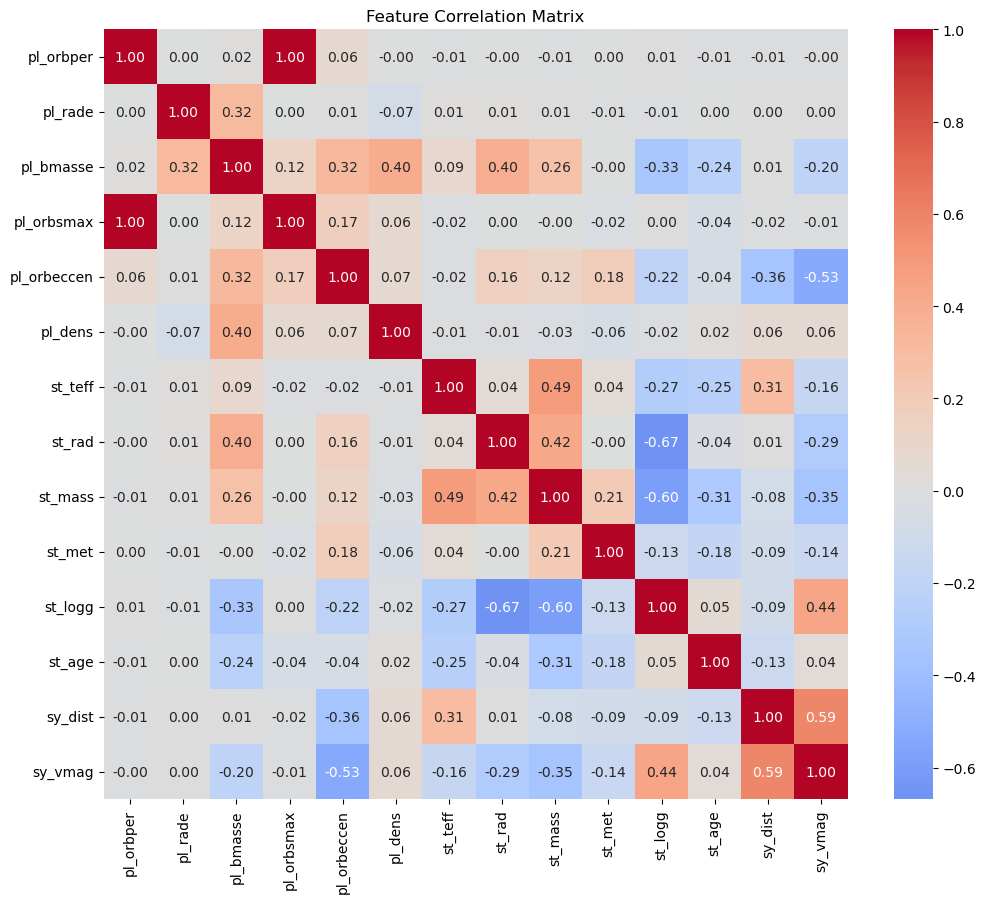

In [18]:
plt.figure(figsize=(12, 10))
# Calculate correlation only on numeric columns
corr = df[available_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
# Define Classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42) # Linear kernel allows for easier interpretation later
}

results = {}
best_model_name = ""
best_score = 0
best_model = None

print("--- Model Evaluation Results ---")

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    
    # Save the best model for visualization
    if acc > best_score:
        best_score = acc
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with {best_score:.4f} accuracy")

--- Model Evaluation Results ---

Random Forest Accuracy: 0.9945

Gradient Boosting Accuracy: 0.9928

Logistic Regression Accuracy: 0.9740

SVM Accuracy: 0.9742

Best Model: Random Forest with 0.9945 accuracy


In [20]:
# Generate detailed report for the best model
y_pred_best = best_model.predict(X_test_scaled)

print(f"Detailed Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_, zero_division=0))

Detailed Report for Random Forest:
                               precision    recall  f1-score   support

    Eclipse Timing Variations       1.00      0.80      0.89         5
                      Imaging       0.97      0.94      0.95        33
                 Microlensing       1.00      1.00      1.00       153
Orbital Brightness Modulation       1.00      0.50      0.67         4
              Radial Velocity       0.98      0.97      0.97       554
                      Transit       1.00      1.00      1.00      7051
    Transit Timing Variations       1.00      0.56      0.72        32

                     accuracy                           0.99      7832
                    macro avg       0.99      0.82      0.89      7832
                 weighted avg       0.99      0.99      0.99      7832



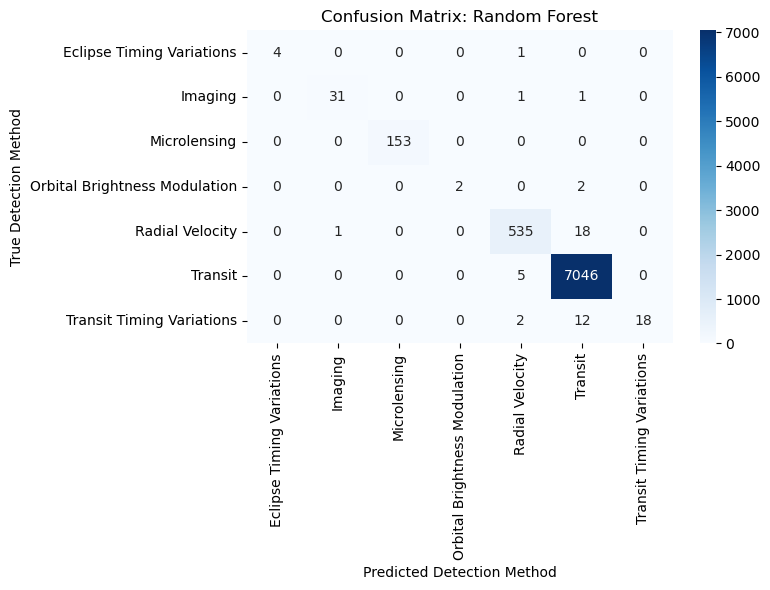

In [21]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted Detection Method')
plt.ylabel('True Detection Method')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.tight_layout()
plt.show()

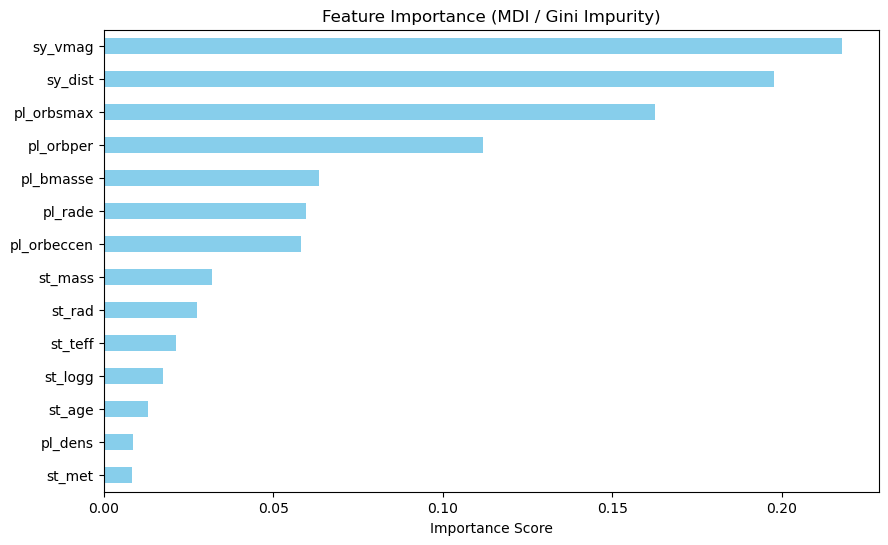

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import shap

# 1. Train the reference Random Forest (assuming X_train, y_train are ready from your preprocessing)
# If not yet split, use the 'data' subset created in cell 10
# X = data.drop(columns=[target_col])
# y = data[target_col]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 2. Impurity-based (MDI) Feature Importance
mdi_importances = pd.Series(rf_model.feature_importances_, index=available_cols).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mdi_importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (MDI / Gini Impurity)")
plt.xlabel("Importance Score")
plt.show()

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_13537/2921176227.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(available_cols)[sorted_idx])


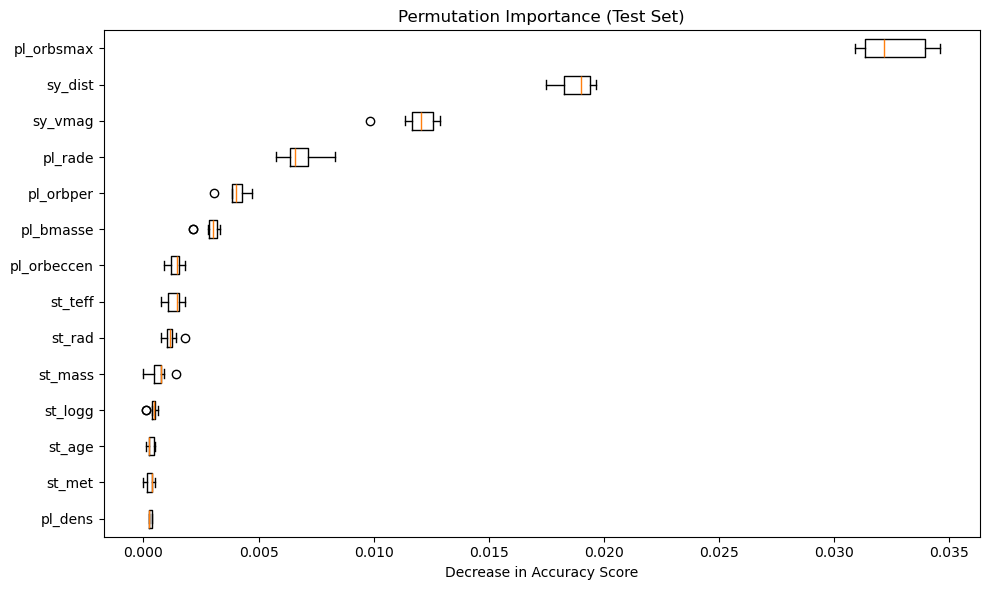

In [23]:
# Calculate Permutation Importance on the Test Set
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(available_cols)[sorted_idx])
plt.title("Permutation Importance (Test Set)")
plt.xlabel("Decrease in Accuracy Score")
plt.tight_layout()
plt.show()